In [2]:
import numpy as np
import matplotlib.pyplot as plt
from M_Functions.crc import *
from preambules_list import preambule_list, Preambule
from approximations_list import Approximation, approximation_strings

stat_data = np.load('python_simulations.npz')
loaded_all_energies = stat_data['all_energies'] #[preambule, amplitude step, generations]
loaded_all_points = stat_data['all_points']
loaded_mean_energies = stat_data['mean_energies']
loaded_mean_points = stat_data['mean_points']
loaded_lower_quantile_points = stat_data['lower_quantile_points']
loaded_higher_quantile_points = stat_data['higher_quantile_points']

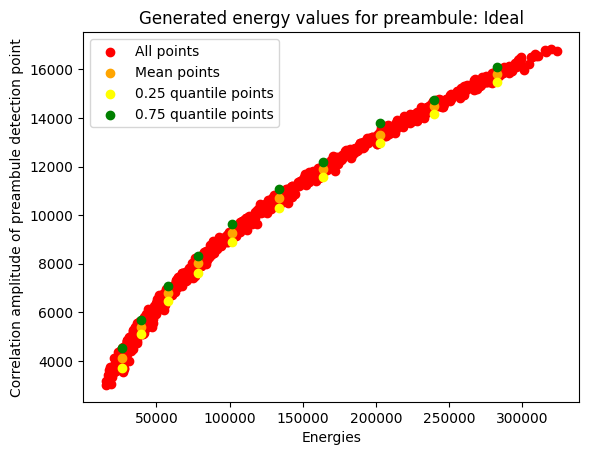

In [3]:
preambule_to_show = Preambule.Ideal.value

plt.scatter(loaded_all_energies[preambule_to_show, :, :], loaded_all_points[preambule_to_show, :, :], marker='o', color='red', label="All points")
plt.scatter(loaded_mean_energies[preambule_to_show, :], loaded_mean_points[preambule_to_show, :], marker='o', color='orange', label="Mean points")
plt.scatter(loaded_mean_energies[preambule_to_show, :], loaded_lower_quantile_points[preambule_to_show, :], marker='o', color='yellow', label="0.25 quantile points")
plt.scatter(loaded_mean_energies[preambule_to_show, :], loaded_higher_quantile_points[preambule_to_show, :], marker='o', color='green', label="0.75 quantile points")
plt.xlabel('Energies')
plt.ylabel('Correlation amplitude of preambule detection point')
plt.title("Generated energy values for preambule: " + preambule_list[preambule_to_show].get_name())
plt.legend()
plt.show()

Preambule Ideal correlation coef: 0.9450637543149634
Preambule Negative correlation coef: 0.3808005341547504
Preambule Negative normalized correlation coef: 0.5675129630073505
Preambule Extended correlation coef: 0.9154913763177844
Preambule Extended negative correlation coef: 0.07377758435898721
Preambule Extended normalized correlation coef: 0.6059261268392678
Preambule Differentiated correlation coef: 0.23750028629437062


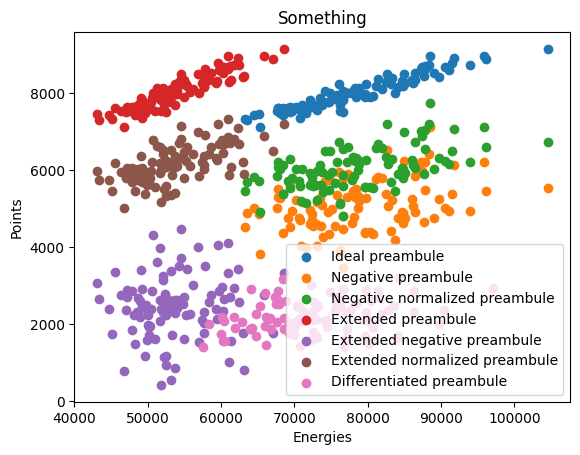

In [4]:
amplitude_i = 3
for preambule_i in range(len(preambule_list)):
    corr_coef = np.corrcoef(loaded_all_energies[preambule_i, amplitude_i, :], loaded_all_points[preambule_i, amplitude_i, :])
    print("Preambule " + preambule_list[preambule_i].get_name() + " correlation coef: " + str(corr_coef[1][0]))
    plt.scatter(loaded_all_energies[preambule_i, amplitude_i, :], loaded_all_points[preambule_i, amplitude_i, :], label=preambule_list[preambule_i].get_name() + " preambule")
plt.xlabel('Energies')
plt.ylabel('Points')
plt.title("Something")
plt.legend()
plt.show()

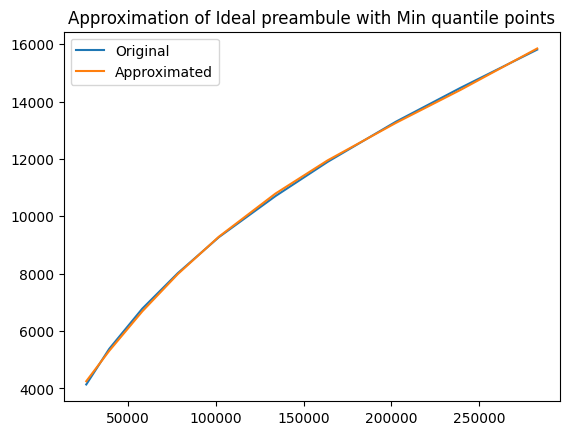

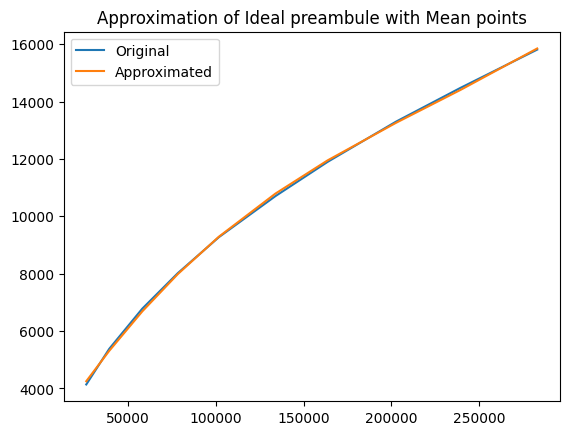

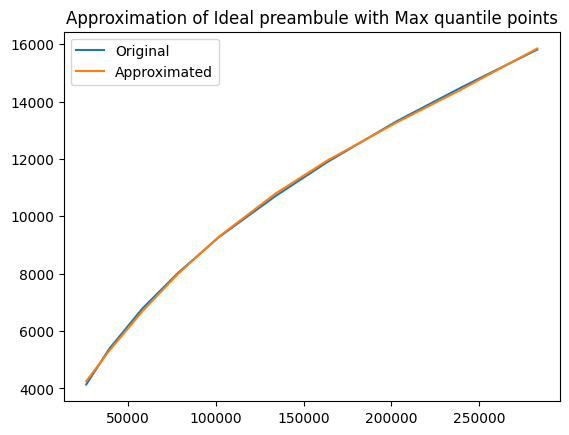

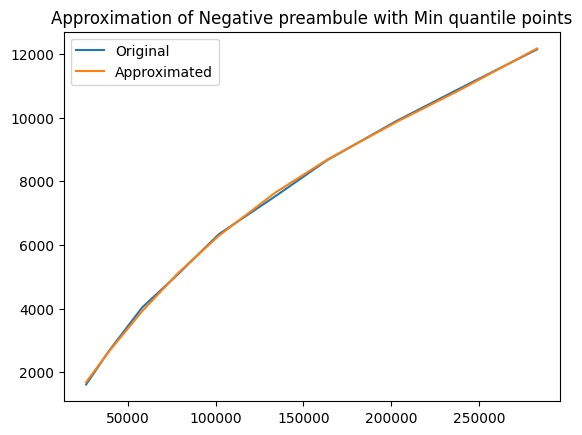

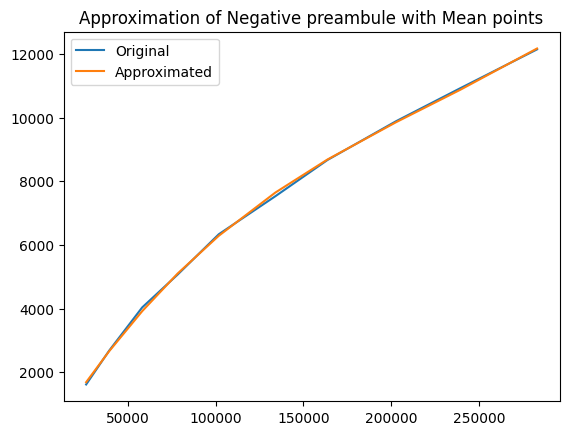

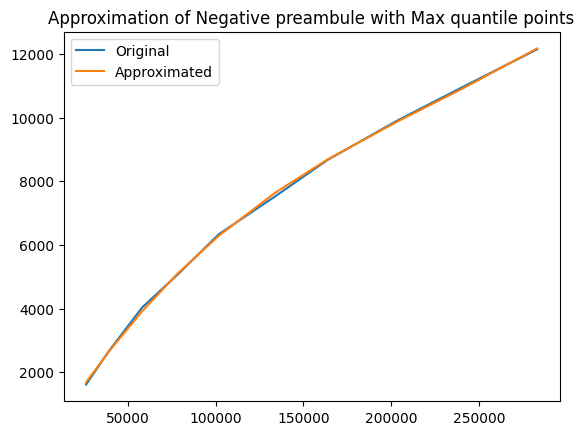

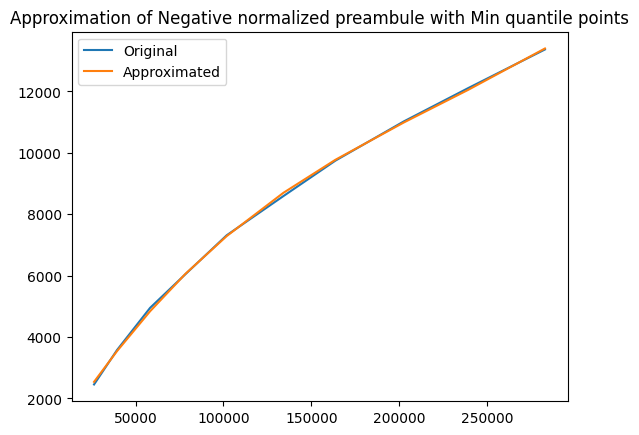

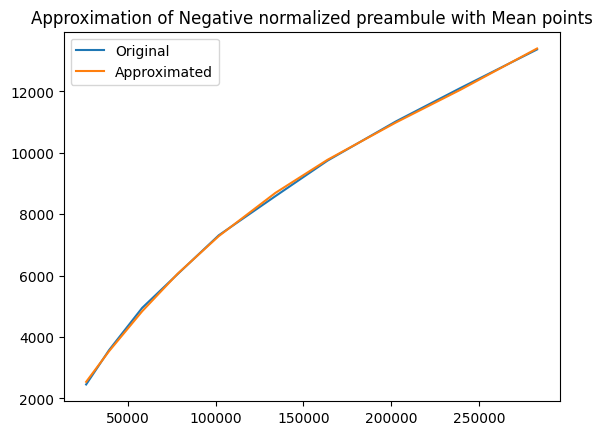

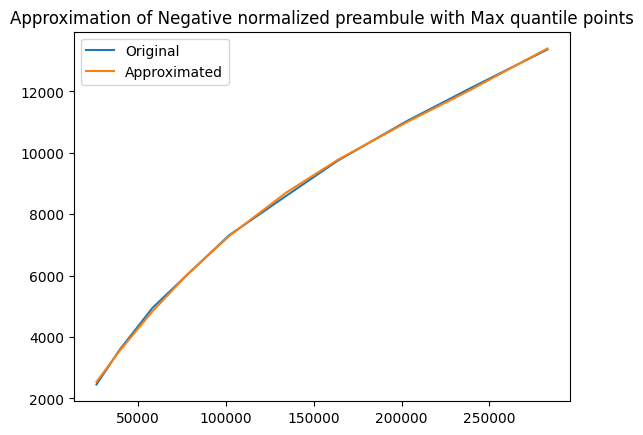

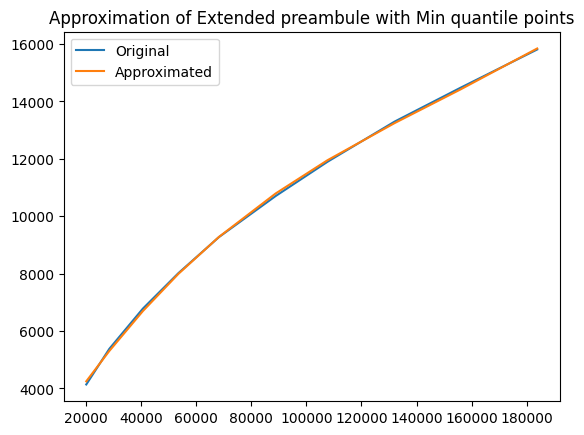

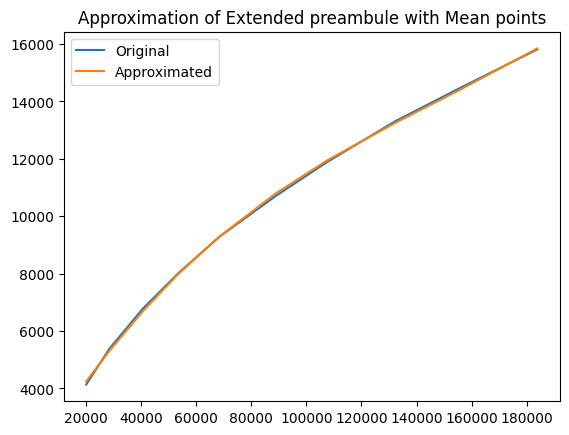

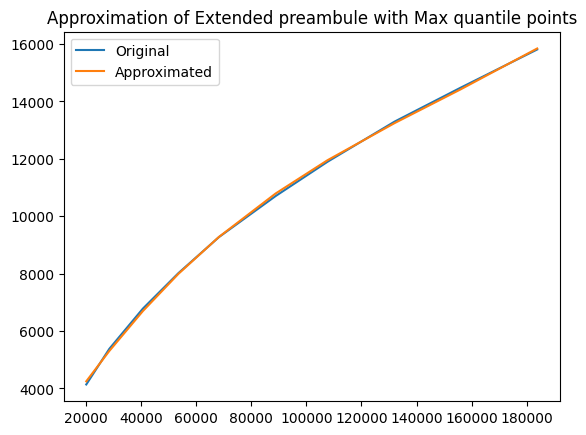

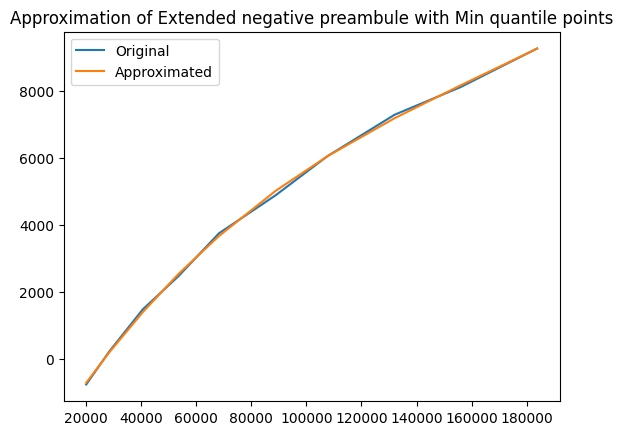

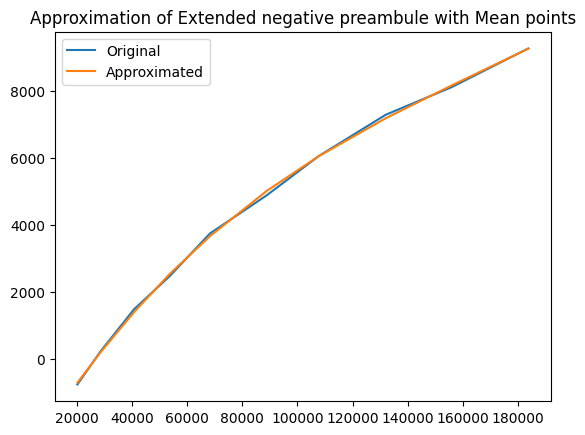

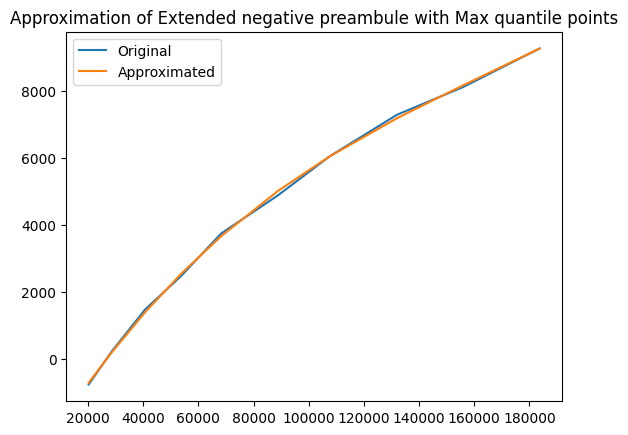

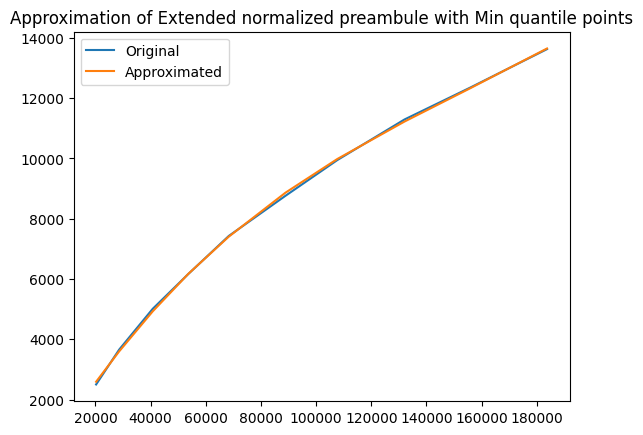

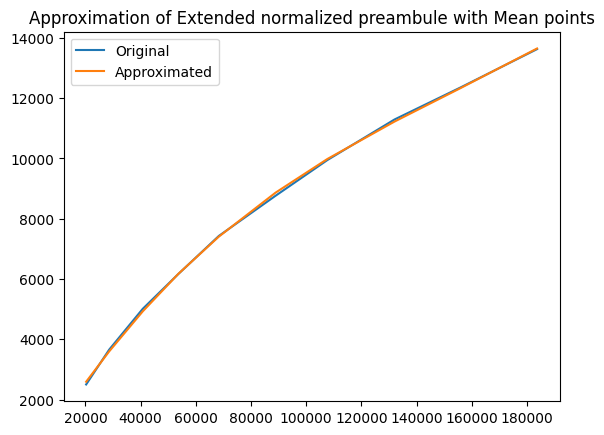

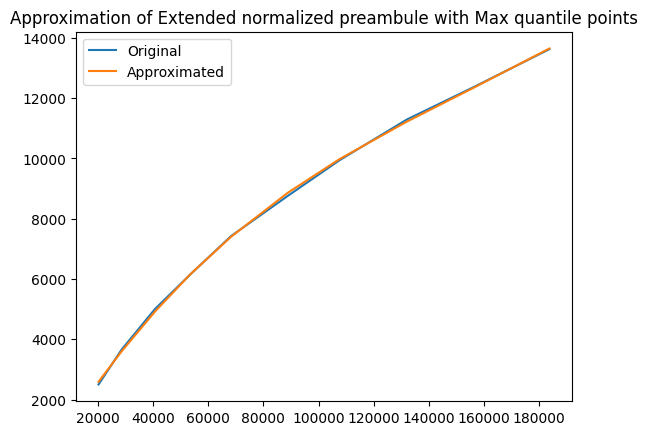

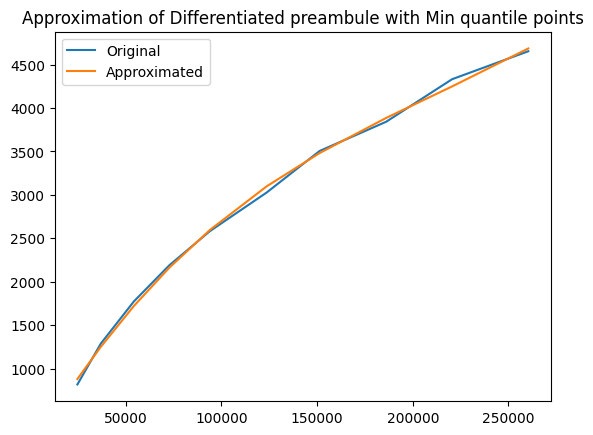

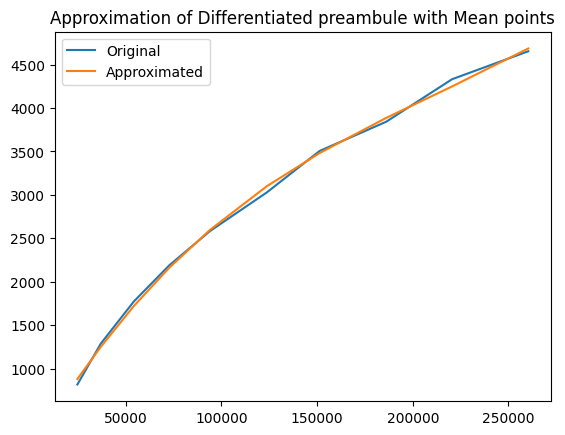

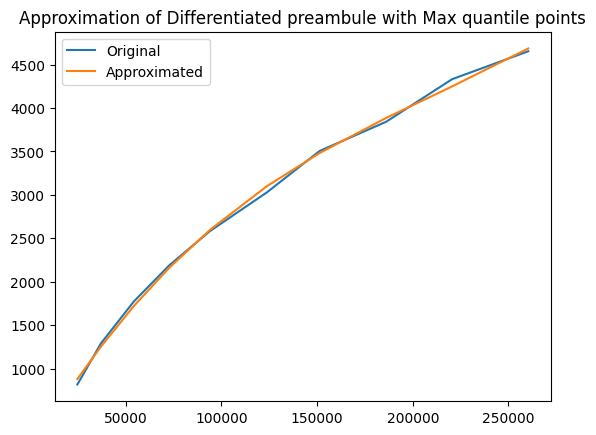

In [5]:
# Polynomial fitting
poly_degree = 3
all_poly_coeffs = np.zeros((int(list(Preambule)[-1].value + 1), int(list(Approximation)[-1].value + 1), poly_degree + 1))
for preambule_type in Preambule:
    for approximation_type in Approximation:
        og_x = loaded_mean_energies[preambule_type.value, :]
        og_y = loaded_mean_points[preambule_type.value, :]
        poly_coeff =  np.polyfit(og_x, og_y, poly_degree)
        all_poly_coeffs[preambule_type.value, approximation_type.value, :] = poly_coeff
        approx_y = np.polyval(poly_coeff, og_x)
        plt.plot(og_x, og_y, label = "Original")
        plt.plot(og_x, approx_y, label = "Approximated")
        plt.title("Approximation of " + preambule_list[preambule_type.value].get_name() + " preambule with "
                  + approximation_strings[approximation_type.value] + " points")
        plt.legend()
        plt.show()

np.savez('python_approximations.npz', all_poly_coeffs=all_poly_coeffs)